In [ ]:
# Decision Tree _ensemble_learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("BreastCancer.csv")

In [3]:
df=data.copy()
df.head(2)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0


In [4]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [5]:
# although in medical data set it is not recoomended to use imputation approach
# but just fpor learning we are doing .
df["Bare.nuclei"]=df["Bare.nuclei"].fillna(df["Bare.nuclei"].mean())

In [6]:
df.isnull().sum().sum()

0

In [7]:
df["Class"].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: Class, dtype: float64

In [8]:
X=df.drop(["Id",'Class'],axis=1)
Y=df["Class"]

# for the tree based algorithms --- Scaling and outlier treatment is not required

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [12]:
# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
#dt=DecisionTreeClassifier(class_weight="balanced",criterion='gini',max_depth=None,min_samples_split=4,ccp_alpha=0)
dt=DecisionTreeClassifier(class_weight="balanced",criterion='entropy',max_depth=None,min_samples_split=4,ccp_alpha=0)

In [15]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',
                       criterion='entropy', min_samples_split=4)

In [16]:
Y_pred_test=dt.predict(X_test)

In [17]:
accuracy_score(Y_test,Y_pred_test)

0.9214285714285714

In [18]:
dt.score(X_test,Y_test)

0.9214285714285714

In [19]:
dt.score(X_train,Y_train)

0.9910554561717353

In [20]:
# drawing the tree

In [21]:
from sklearn import tree

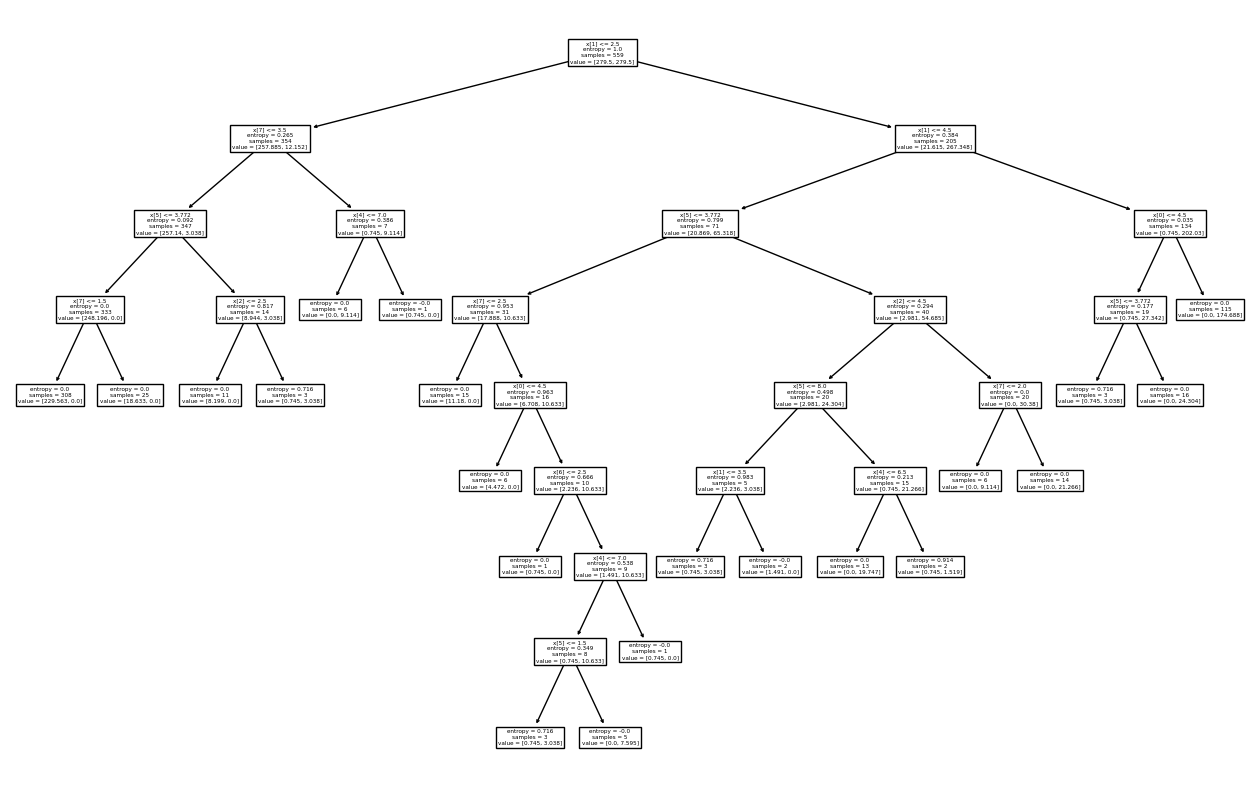

In [22]:
plt.figure(figsize=(16,10))
tree.plot_tree(dt)
plt.show()

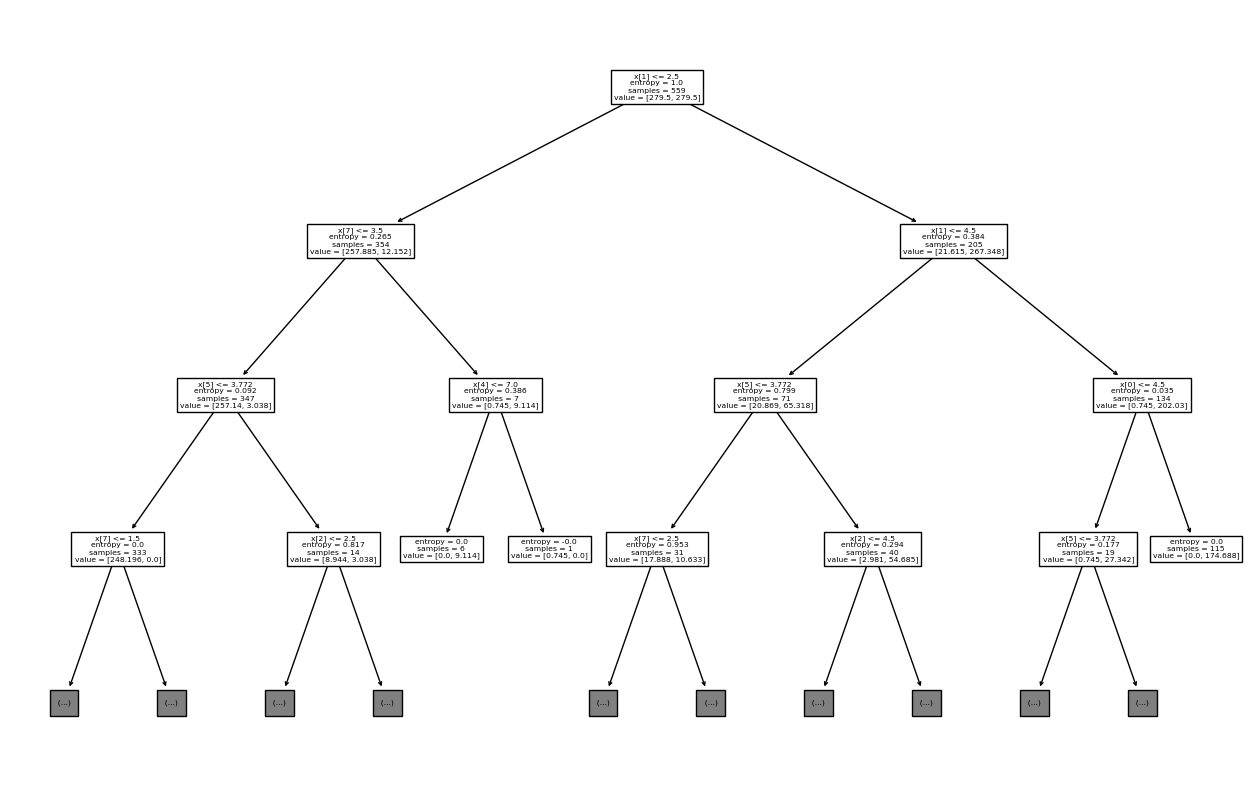

In [23]:
plt.figure(figsize=(16,10))
tree.plot_tree(dt,max_depth=3)
plt.show()

In [24]:
# cross validation approach
from sklearn.model_selection import cross_val_score,KFold


In [25]:
kf=KFold(n_splits=5)
DT=DecisionTreeClassifier(class_weight="balanced",criterion='entropy',max_depth=None,min_samples_split=4,ccp_alpha=0)

In [26]:
scores=cross_val_score(DT,X,Y,cv=kf,scoring="accuracy")

print(scores)

[0.89285714 0.94285714 0.93571429 0.97142857 0.96402878]


In [27]:
np.mean(scores)

0.9413771839671121

In [28]:
np.std(scores)

0.027584900357114615

# hyper parameter optimization

(1)GridSearchCV- 
(2)RandomizedSearchCV

In [30]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [31]:
dt=DecisionTreeClassifier()

In [32]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [33]:
param_grid={"criterion":["gini","entropy"],
           "splitter":["best","random"],
           "max_depth":(2,20,1)}

In [34]:
param_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': (2, 20, 1)}

In [35]:
random_dt=RandomizedSearchCV(dt,param_grid,cv=5,n_iter=40)

In [36]:
%%time 
random_dt.fit(X,Y)
print("best parameters", random_dt.best_params_)


best parameters {'splitter': 'random', 'max_depth': 20, 'criterion': 'gini'}
CPU times: total: 250 ms
Wall time: 336 ms


In [37]:
# random_dt will be the version of dt (decisiontree having optimized parameters)

In [38]:
random_dt.best_score_

0.9427852004110997

In [39]:
random_dt.score(X_train,Y_train)

1.0

In [40]:
random_dt.score(X_test,Y_test)

1.0

# grid search CV

In [41]:
grid_dt=GridSearchCV(dt,param_grid,cv=5)

In [42]:
%%time 
grid_dt.fit(X,Y)
print("best parameters", grid_dt.best_params_)


best parameters {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'random'}
CPU times: total: 234 ms
Wall time: 247 ms


In [43]:
grid_dt.best_score_

0.9470811921891059

In [44]:
grid_dt.score(X_train,Y_train)

1.0

In [45]:
grid_dt.score(X_test,Y_test)

1.0

In [46]:
# Ensemble learning -- WE ARE TAKING THE ADVICE FROM DIFFERNT CONSULTANTS

(1)Bagging method--- Random forest , Bagging
(2)Boosting Method---adaboost , gradient boosting,XGBoost,Catboost,lightGBM
(3)Voting approach---we apply different algo(DT,RF,KNN,SVM,ADB,XGB)- soft voting/hard voding 
(4)Stacking approach----we apply different algo(DT,RF,KNN,SVM,ADB,XGB)-- it will make one algo(for example logistic regression ) 
as the most powerful. 

In [48]:
# PCA -- IN DETAIL-   LDA, T-SEN
# CLUSTERING APPROACH (unsupervised ML) ---
#  Naive bayes --

In [49]:
# project session 

In [ ]:
# ensemble learning Bagging approach

In [50]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier

In [51]:
rf=RandomForestClassifier()

In [52]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [53]:
rf.score(X_train,Y_train)

1.0

In [54]:
rf.score(X_test,Y_test)

0.9214285714285714

In [55]:
# out of bag OOB 

In [56]:
oob_error=1-rf.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [64]:
rf=RandomForestClassifier(oob_score=True)

In [65]:
rf.fit(X_train,Y_train)

RandomForestClassifier(oob_score=True)

In [66]:
oob_error=1-rf.oob_score_

In [67]:
oob_error

0.028622540250447193

In [68]:
# bagging we can change the base estimator

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr=LogisticRegression()

In [71]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [72]:
lr.score(X_train,Y_train)

0.9803220035778175

In [73]:
lr.score(X_test,Y_test)

0.9214285714285714

In [74]:
bg=BaggingClassifier(estimator=lr,oob_score=True)

In [75]:
bg.fit(X_train,Y_train)

BaggingClassifier(estimator=LogisticRegression(), oob_score=True)

In [76]:
bg.score(X_train,Y_train)

0.9803220035778175

In [77]:
bg.score(X_test,Y_test)

0.9142857142857143

In [78]:
oob_error=1-bg.oob_score_

In [79]:
oob_error

0.028622540250447193

In [80]:
rf_model=RandomForestClassifier(max_features=2)

In [81]:
rf_model=rf_model.fit(X_train,Y_train)

In [82]:
bg_model=BaggingClassifier(max_features=2)

In [83]:
bg_model=bg_model.fit(X_train,Y_train)

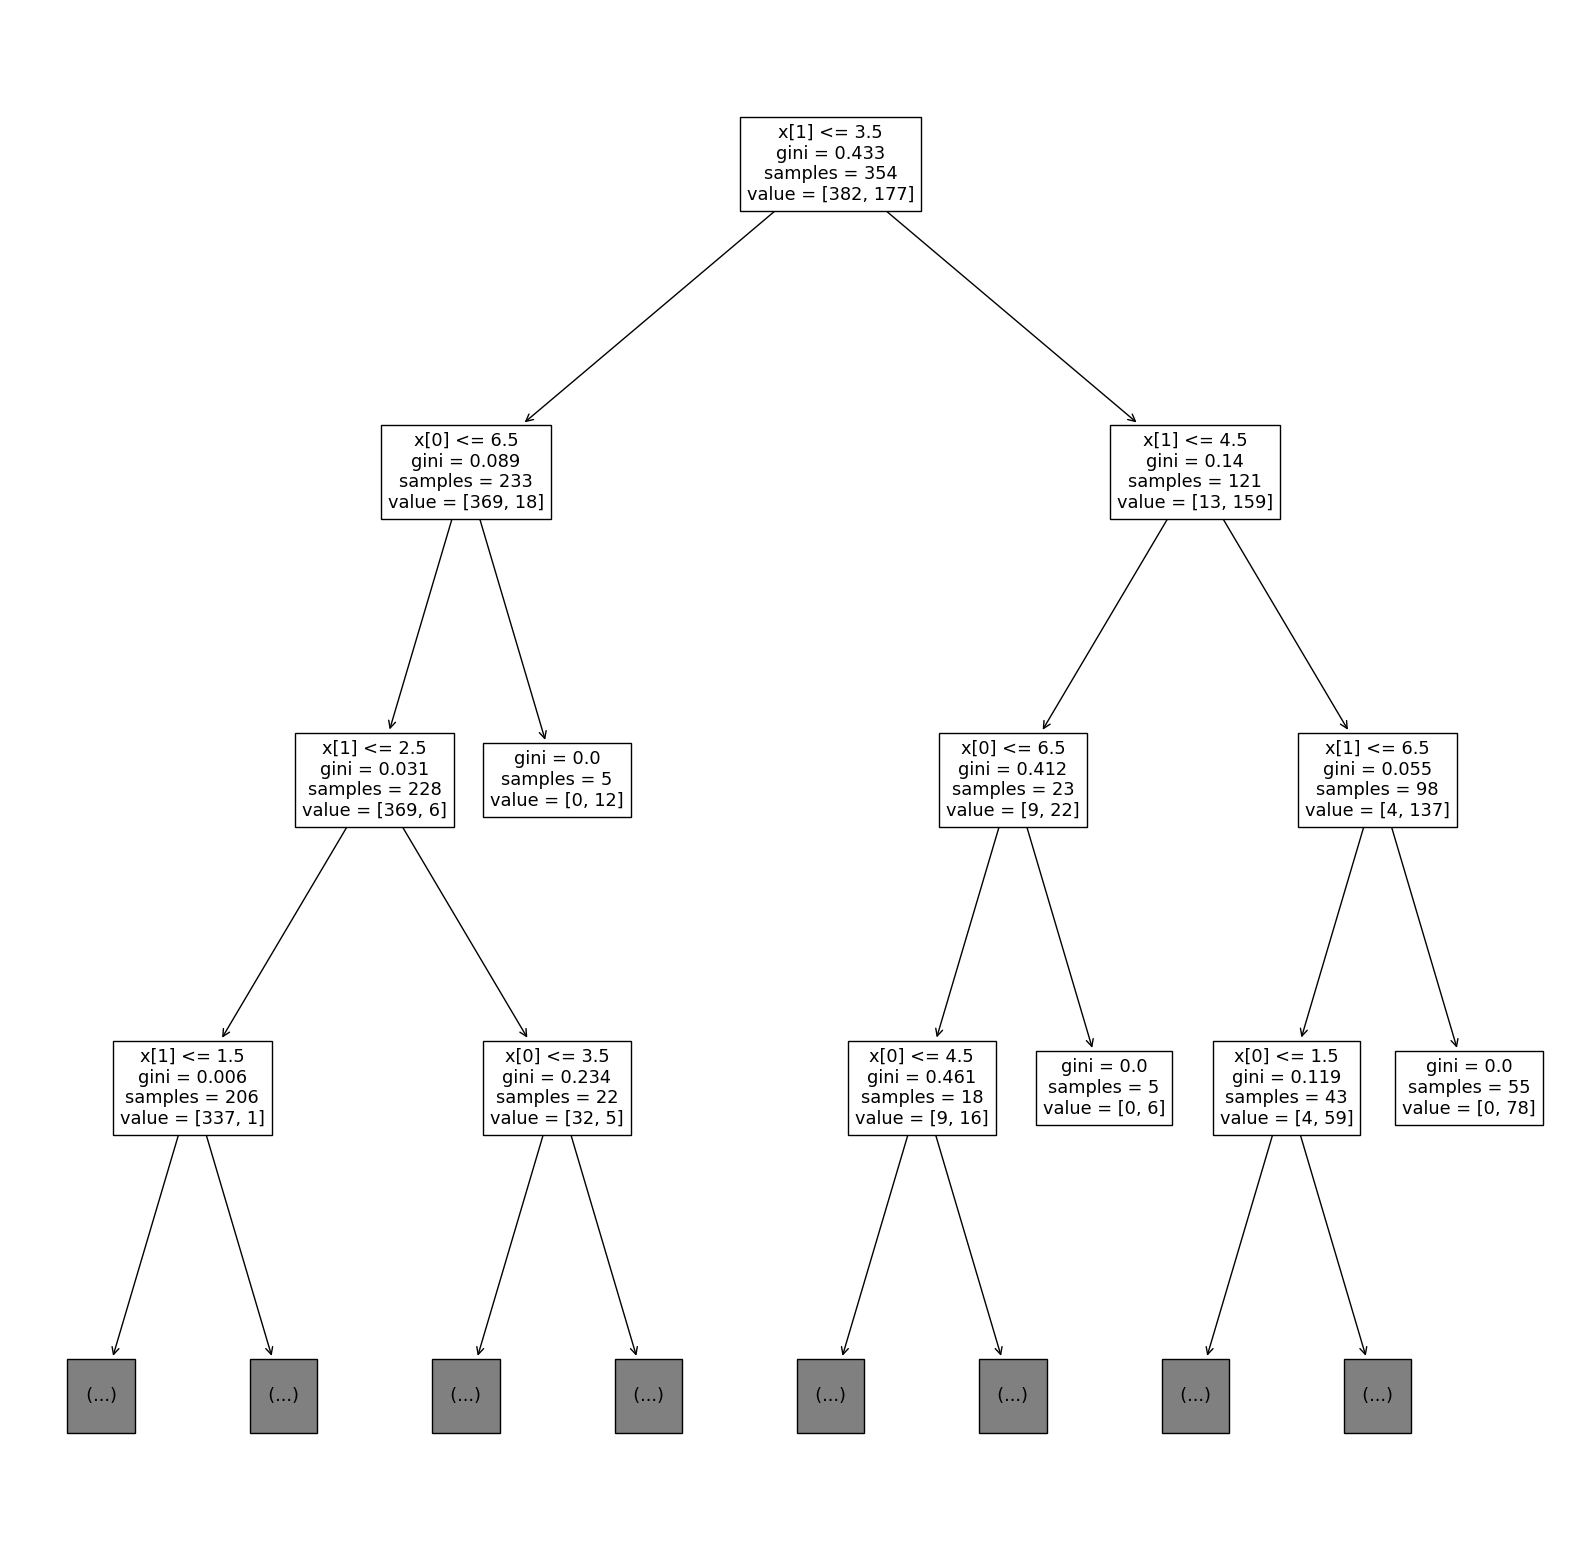

In [84]:
# Bagging tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(bg_model.estimators_[0],max_depth=3)
plt.show()

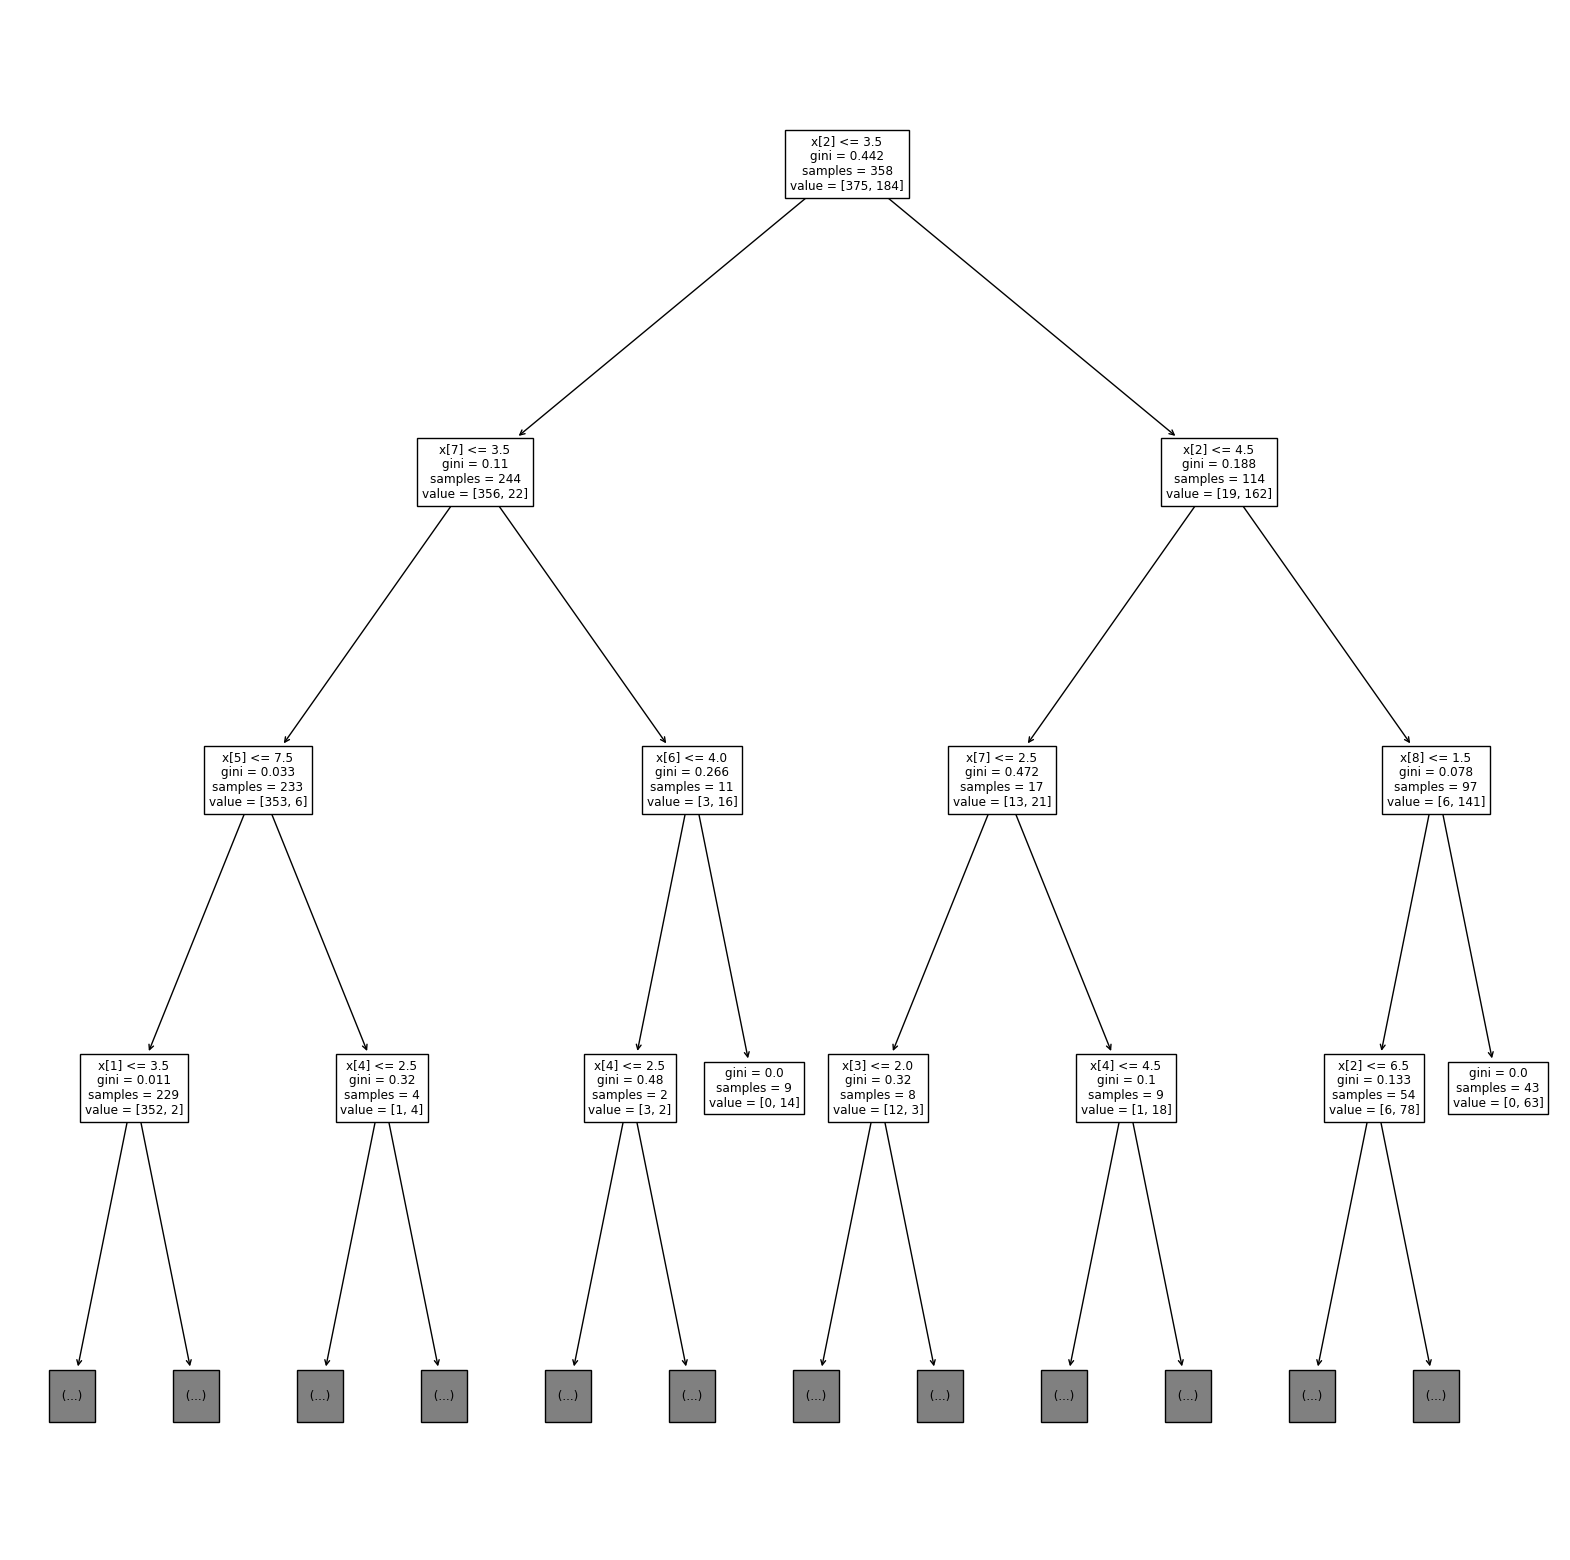

In [85]:
# Random forest tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(rf_model.estimators_[0],max_depth=3)
plt.show()

In [86]:
et=ExtraTreesClassifier()

In [87]:
et.fit(X_train,Y_train)

ExtraTreesClassifier()

In [88]:
#ccp_alpha -->cost_complexity_pruning technique

In [89]:
dt=DecisionTreeClassifier()

In [90]:
path=dt.cost_complexity_pruning_path(X_train,Y_train)
# it will return two values ccp_alpha,impurities

In [91]:
ccp_alpha,impurities=path.ccp_alphas,path.impurities
print("ccp alpha value",ccp_alpha)
print("impurities",impurities)

ccp alpha value [0.         0.00118329 0.00166113 0.00237203 0.00238521 0.00238521
 0.00246706 0.00286225 0.00298151 0.00351895 0.00439096 0.00530807
 0.0095775  0.01041303 0.03991082 0.32767691]
impurities [0.         0.00354987 0.00687212 0.01398823 0.01637344 0.01875865
 0.02615982 0.02902208 0.03200359 0.03904149 0.04343245 0.05404859
 0.06362609 0.07403912 0.11394994 0.44162685]


In [92]:
# finding the best value of ccp alpha

In [93]:
dt_prunning=[]
for x in ccp_alpha:
    dt=DecisionTreeClassifier(random_state=100,ccp_alpha=x)
    dt.fit(X_train,Y_train)
    dt_prunning.append(dt)

In [94]:
train_scores=[dt.score(X_train,Y_train)for dt in dt_prunning]
test_scores=[dt.score(X_test,Y_test)for dt in dt_prunning]

In [95]:
# plot the graph with r. to ccp alpha

Text(0, 0.5, 'accuracy')

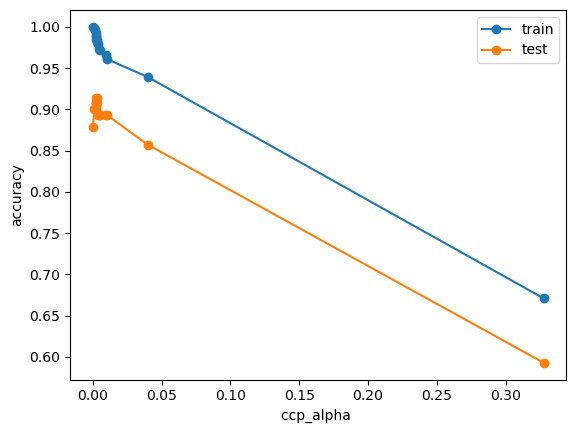

In [96]:
plt.plot(ccp_alpha,train_scores,label="train",marker="o")
plt.plot(ccp_alpha,test_scores,label="test",marker="o")
plt.legend()
plt.xlabel("ccp_alpha ")
plt.ylabel("accuracy")

In [97]:
dt=DecisionTreeClassifier(ccp_alpha=0.00)

In [98]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [99]:
dt.score(X_train,Y_train)

1.0

In [100]:
dt.score(X_test,Y_test)

0.8785714285714286

# Gradient decent 

In [120]:
def gradient_descent(x,y):
    
    m = 0
    c = 0
    learning_rate = 0.01
    iterations = 1000
    n = len(x)
    
    for i in range(iterations):
        y_pred = m * x + c
        
        cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        
        dm = (-2/n) * sum((y - y_pred)* x)
        dc = (-2/n) * sum((y - y_pred))
        
        m = m - learning_rate * dm
        c = c - learning_rate * dc
        
        print("Iteration = {} | Slope = {} | Intercept = {} | Cost = {}".format(i+1,m,c,cost))

In [121]:
x = np.array([1,2,3,4,5])
y = np.array([15,24,33,42,51])

In [122]:
gradient_descent(x,y)

Iteration = 1 | Slope = 2.34 | Intercept = 0.66 | Cost = 1251.0
Iteration = 2 | Slope = 4.1256 | Intercept = 1.1664 | Cost = 729.8136000000001
Iteration = 3 | Slope = 5.487984000000001 | Intercept = 1.555536 | Cost = 426.08661696
Iteration = 4 | Slope = 6.527295360000001 | Intercept = 1.85514624 | Cost = 249.08425255065592
Iteration = 5 | Slope = 7.319981606400001 | Intercept = 2.0864055936 | Cost = 145.93075804207956
Iteration = 6 | Slope = 7.924401317376001 | Intercept = 2.265478585344 | Cost = 85.81276453603536
Iteration = 7 | Slope = 8.38510431243264 | Intercept = 2.4047049345945597 | Cost = 50.773765866222234
Iteration = 8 | Slope = 8.736099067621785 | Intercept = 2.51350457715671 | Cost = 30.349598967307095
Iteration = 9 | Slope = 9.003346998115589 | Intercept = 2.599068541556269 | Cost = 18.44226741364256
Iteration = 10 | Slope = 9.206666546036782 | Intercept = 2.666886350838208 | Cost = 11.498160544296486
Iteration = 11 | Slope = 9.361186724858397 | Intercept = 2.72114863105923

In [124]:
import pandas as pd
Dataset=pd.read_csv("Advertising.csv")
Dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [125]:
Dataset=Dataset.drop(["Unnamed: 0"],axis=1)

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scale=StandardScaler()
df_scaled=scale.fit_transform(Dataset)
df_scaled=pd.DataFrame(df_scaled,columns=Dataset.columns)

In [128]:
x1=df_scaled["Newspaper"]
y1=df_scaled["Sales"]

In [130]:
gradient_descent(x1,y1)

Iteration = 1 | Slope = 0.004565980527523306 | Intercept = -4.297950884080138e-18 | Cost = 0.9999999999999992
Iteration = 2 | Slope = 0.009040641444496143 | Intercept = -8.022749131697538e-18 | Cost = 0.9979360303604051
Iteration = 3 | Slope = 0.013425809143129526 | Intercept = -1.1408929356804266e-17 | Cost = 0.995953793918539
Iteration = 4 | Slope = 0.017723273487790243 | Intercept = -1.4076240173466203e-17 | Cost = 0.994050054039771
Iteration = 5 | Slope = 0.021934788545557745 | Intercept = -1.7909285165984556e-17 | Cost = 0.9922217022602015
Iteration = 6 | Slope = 0.026062073302169895 | Intercept = -2.0813906154160123e-17 | Cost = 0.9904657532111018
Iteration = 7 | Slope = 0.0301068123636498 | Intercept = -2.3628321521584896e-17 | Cost = 0.9887793397443482
Iteration = 8 | Slope = 0.03407065664390011 | Intercept = -2.6333102365327934e-17 | Cost = 0.9871597082508774
Iteration = 9 | Slope = 0.03795522403854542 | Intercept = -2.906980212102894e-17 | Cost = 0.9856042141645481
Iteration 

Iteration = 138 | Slope = 0.2142481793708234 | Intercept = -2.0763876729112956e-16 | Cost = 0.9480851213003508
Iteration = 139 | Slope = 0.21452919631093026 | Intercept = -2.0817583767929198e-16 | Cost = 0.9480769808572626
Iteration = 140 | Slope = 0.21480459291223497 | Intercept = -2.082188588214962e-16 | Cost = 0.9480691627757196
Iteration = 141 | Slope = 0.21507448158151357 | Intercept = -2.0846449566569452e-16 | Cost = 0.9480616542902078
Iteration = 142 | Slope = 0.2153389724774066 | Intercept = -2.0889609486651755e-16 | Cost = 0.9480544431407212
Iteration = 143 | Slope = 0.21559817355538177 | Intercept = -2.0971349656839782e-16 | Cost = 0.948047517552754
Iteration = 144 | Slope = 0.21585219061179745 | Intercept = -2.1029220031998369e-16 | Cost = 0.9480408662180712
Iteration = 145 | Slope = 0.2161011273270848 | Intercept = -2.1046012155245824e-16 | Cost = 0.9480344782762398
Iteration = 146 | Slope = 0.21634508530806643 | Intercept = -2.1035603814389963e-16 | Cost = 0.94802834329690

Iteration = 251 | Slope = 0.22686601691358416 | Intercept = -2.300361290341611e-16 | Cost = 0.9478816927440744
Iteration = 252 | Slope = 0.22689467710283578 | Intercept = -2.299598012012181e-16 | Cost = 0.9478816080718151
Iteration = 253 | Slope = 0.22692276408830236 | Intercept = -2.298612689077826e-16 | Cost = 0.9478815267525768
Iteration = 254 | Slope = 0.2269502893340596 | Intercept = -2.301596413456506e-16 | Cost = 0.9478814486535803
Iteration = 255 | Slope = 0.22697726407490174 | Intercept = -2.302359691785936e-16 | Cost = 0.947881373647304
Iteration = 256 | Slope = 0.227003699320927 | Intercept = -2.3032895035690595e-16 | Cost = 0.9478813016112757
Iteration = 257 | Slope = 0.22702960586203177 | Intercept = -2.30519076049873e-16 | Cost = 0.9478812324278748
Iteration = 258 | Slope = 0.22705499427231446 | Intercept = -2.302984192237288e-16 | Cost = 0.9478811659841363
Iteration = 259 | Slope = 0.22707987491439147 | Intercept = -2.3061344500696617e-16 | Cost = 0.9478811021715703
Iter

Iteration = 340 | Slope = 0.2280616870009273 | Intercept = -2.361853768118036e-16 | Cost = 0.947879613208318
Iteration = 341 | Slope = 0.22806643378843205 | Intercept = -2.360979467486144e-16 | Cost = 0.947879610885674
Iteration = 342 | Slope = 0.22807108564018672 | Intercept = -2.3613264121813394e-16 | Cost = 0.9478796086550066
Iteration = 343 | Slope = 0.2280756444549063 | Intercept = -2.3631999135353944e-16 | Cost = 0.9478796065126739
Iteration = 344 | Slope = 0.22808011209333148 | Intercept = -2.361964790420499e-16 | Cost = 0.9478796044551773
Iteration = 345 | Slope = 0.22808449037898815 | Intercept = -2.357593287261037e-16 | Cost = 0.9478796024791574
Iteration = 346 | Slope = 0.2280887810989317 | Intercept = -2.358328810014851e-16 | Cost = 0.9478796005813888
Iteration = 347 | Slope = 0.22809298600447636 | Intercept = -2.3618954014814594e-16 | Cost = 0.9478795987587719
Iteration = 348 | Slope = 0.22809710681191014 | Intercept = -2.3569687868096854e-16 | Cost = 0.9478795970083295
It

Iteration = 430 | Slope = 0.22826050368605125 | Intercept = -2.35438751827743e-16 | Cost = 0.9478795561008821
Iteration = 431 | Slope = 0.22826127413985353 | Intercept = -2.360146800217673e-16 | Cost = 0.9478795560396917
Iteration = 432 | Slope = 0.22826202918457977 | Intercept = -2.3505572488424733e-16 | Cost = 0.9478795559809261
Iteration = 433 | Slope = 0.22826276912841148 | Intercept = -2.3468518794977866e-16 | Cost = 0.9478795559244868
Iteration = 434 | Slope = 0.22826349427336656 | Intercept = -2.3470878018905194e-16 | Cost = 0.9478795558702828
Iteration = 435 | Slope = 0.22826420491542254 | Intercept = -2.341883631462589e-16 | Cost = 0.9478795558182261
Iteration = 436 | Slope = 0.2282649013446374 | Intercept = -2.346671468256285e-16 | Cost = 0.9478795557682287
Iteration = 437 | Slope = 0.22826558384526796 | Intercept = -2.346962901800249e-16 | Cost = 0.9478795557202123
Iteration = 438 | Slope = 0.2282662526958859 | Intercept = -2.347032290739288e-16 | Cost = 0.9478795556740982
I

Iteration = 590 | Slope = 0.22829750621820535 | Intercept = -2.3574406315951456e-16 | Cost = 0.9478795545581008
Iteration = 591 | Slope = 0.22829753662136457 | Intercept = -2.353763017826075e-16 | Cost = 0.9478795545580053
Iteration = 592 | Slope = 0.2282975664164606 | Intercept = -2.360771300669021e-16 | Cost = 0.947879554557915
Iteration = 593 | Slope = 0.22829759561565469 | Intercept = -2.3589533104661973e-16 | Cost = 0.9478795545578264
Iteration = 594 | Slope = 0.2282976242308649 | Intercept = -2.357107564687758e-16 | Cost = 0.947879554557742
Iteration = 595 | Slope = 0.22829765227377088 | Intercept = -2.3576765539878784e-16 | Cost = 0.9478795545576614
Iteration = 596 | Slope = 0.22829767975581877 | Intercept = -2.357801454078149e-16 | Cost = 0.9478795545575832
Iteration = 597 | Slope = 0.22829770668822572 | Intercept = -2.3575377761098005e-16 | Cost = 0.9478795545575082
Iteration = 598 | Slope = 0.2282977330819845 | Intercept = -2.360105166854246e-16 | Cost = 0.9478795545574364
It

Iteration = 689 | Slope = 0.22829882065915155 | Intercept = -2.3576210428366457e-16 | Cost = 0.9478795545557394
Iteration = 690 | Slope = 0.22829882477349184 | Intercept = -2.352805450467334e-16 | Cost = 0.9478795545557371
Iteration = 691 | Slope = 0.2282988288055453 | Intercept = -2.351764616381748e-16 | Cost = 0.9478795545557358
Iteration = 692 | Slope = 0.2282988327569577 | Intercept = -2.34889191430553e-16 | Cost = 0.9478795545557341
Iteration = 693 | Slope = 0.22829883662934186 | Intercept = -2.3525140169233696e-16 | Cost = 0.9478795545557321
Iteration = 694 | Slope = 0.22829884042427834 | Intercept = -2.3528054504673335e-16 | Cost = 0.9478795545557311
Iteration = 695 | Slope = 0.22829884414331608 | Intercept = -2.3543736404896164e-16 | Cost = 0.9478795545557298
Iteration = 696 | Slope = 0.22829884778797307 | Intercept = -2.3579679875318403e-16 | Cost = 0.9478795545557281
Iteration = 697 | Slope = 0.22829885135973693 | Intercept = -2.3589533104661953e-16 | Cost = 0.947879554555727

Iteration = 796 | Slope = 0.22829900269187864 | Intercept = -2.3697085960172506e-16 | Cost = 0.9478795545556955
Iteration = 797 | Slope = 0.22829900316556437 | Intercept = -2.3650595371016327e-16 | Cost = 0.9478795545556956
Iteration = 798 | Slope = 0.2282990036297764 | Intercept = -2.366322415792144e-16 | Cost = 0.9478795545556952
Iteration = 799 | Slope = 0.2282990040847042 | Intercept = -2.367918361390043e-16 | Cost = 0.947879554555696
Iteration = 800 | Slope = 0.22829900453053342 | Intercept = -2.3635191026549655e-16 | Cost = 0.9478795545556955
Iteration = 801 | Slope = 0.22829900496744607 | Intercept = -2.3667248716385705e-16 | Cost = 0.9478795545556952
Iteration = 802 | Slope = 0.22829900539562045 | Intercept = -2.3659615933091405e-16 | Cost = 0.9478795545556955
Iteration = 803 | Slope = 0.22829900581523135 | Intercept = -2.3707494301028367e-16 | Cost = 0.9478795545556952
Iteration = 804 | Slope = 0.22829900622645002 | Intercept = -2.368237550509622e-16 | Cost = 0.947879554555695

Iteration = 903 | Slope = 0.22829902364938343 | Intercept = -2.358953310466194e-16 | Cost = 0.9478795545556951
Iteration = 904 | Slope = 0.22829902370391905 | Intercept = -2.3652121927675183e-16 | Cost = 0.9478795545556952
Iteration = 905 | Slope = 0.22829902375736397 | Intercept = -2.3572047092024093e-16 | Cost = 0.9478795545556946
Iteration = 906 | Slope = 0.22829902380974 | Intercept = -2.356191630692439e-16 | Cost = 0.947879554555695
Iteration = 907 | Slope = 0.22829902386106848 | Intercept = -2.360507622700669e-16 | Cost = 0.9478795545556957
Iteration = 908 | Slope = 0.2282990239113704 | Intercept = -2.3598553666737016e-16 | Cost = 0.9478795545556953
Iteration = 909 | Slope = 0.22829902396066631 | Intercept = -2.358481465680728e-16 | Cost = 0.9478795545556952
Iteration = 910 | Slope = 0.22829902400897628 | Intercept = -2.3574683871707577e-16 | Cost = 0.9478795545556951
Iteration = 911 | Slope = 0.22829902405632005 | Intercept = -2.3605353782762844e-16 | Cost = 0.9478795545556946
I

In [ ]:
# please do this assignment to use three input variable in the Gradient decent function

def gradient_descent(x1,x2,x3,y):
    
    m1 = 0
    m2=0
    m3=0
    c = 0
    learning_rate = 0.01
    iterations = 1000
    n = len(x1)
    
    for i in range(iterations):
        y_pred = m * x + c
        
        cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        
        dm = (-2/n) * sum((y - y_pred)* x)
        dc = (-2/n) * sum((y - y_pred))
        
        m = m - learning_rate * dm
        c = c - learning_rate * dc
        
        print("Iteration = {} | Slope = {} | Intercept = {} | Cost = {}".format(i+1,m,c,cost))

# Boosting

In [ ]:
# ada boost and gradient boost both works by sequentially adding predictors - as an ensemble correcting approch .

(1)Adaptive Boosting(Ada Boost)

when an observation is wrongly classified, its weight gets updated & for those coreectly classified , 
their weights get decresed. Due to the update of weight , The probability of selecting wrongly classified observation 
will be high with respect to the correct classified observation.
Adaboost - works on the principal of stagewise addition method where multiple no. of weak learner are used for getting strong 
learners.

(2)Gradient Boosting :-method tries to fit the new predictor to the residual error made by the previous predictor.

In [131]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [136]:
ada=AdaBoostClassifier(estimator=rf)

In [137]:
ada.fit(X_train,Y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(oob_score=True))

In [138]:
ada.score(X_train,Y_train)

1.0

In [139]:
ada.score(X_test,Y_test)

0.9214285714285714

In [140]:
gb=GradientBoostingClassifier()

In [141]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [142]:
gb.score(X_train,Y_train)

1.0

In [143]:
gb.score(X_test,Y_test)

0.9142857142857143

In [144]:
y_pred=gb.predict(X_test)

In [146]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        83
           1       0.89      0.89      0.89        57

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140



In [ ]:
# basic difference of ADA BOOST nad Gradient boosting 
(1)Ada boost -- the shortcomings(of existing weak learners ) are identified by the high weight data points.
(2)Gradient boosting--- the shortcomings(of existing weak learners ) are identified by gradients

# XGBOOST 

In [ ]:
-- next version of gradient boosting (Xtreme gradient boosting )
-- regularized form of Gradient boosting algorithm
--- XGBoost learns from its mistakes(gradient boosting mistake)
---XGB has extensive no. of hyper parameters 

In [ ]:
#! pip install XGB

In [148]:
from xgboost import XGBClassifier,XGBRegressor

In [149]:
xb=XGBClassifier()

In [150]:
xb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [151]:
y_predict=xb.predict(X_test)

In [153]:
xb.score(X_train,Y_train)

1.0

In [154]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        83
           1       0.89      0.88      0.88        57

    accuracy                           0.91       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.91      0.91      0.91       140



In [ ]:
# XGB is high performing algorithm
# when the no. of rows are very high , it take less computational time.

# Catboost 
#### the base estimator DT grown by symettric

In [ ]:
#!pip install catboost

In [155]:
from catboost import CatBoostClassifier,CatBoostRegressor

In [156]:
cat=CatBoostClassifier()

In [157]:
cat.fit(X_train,Y_train)

Learning rate set to 0.008037
0:	learn: 0.6764633	total: 441ms	remaining: 7m 20s
1:	learn: 0.6607221	total: 444ms	remaining: 3m 41s
2:	learn: 0.6435372	total: 446ms	remaining: 2m 28s
3:	learn: 0.6259467	total: 448ms	remaining: 1m 51s
4:	learn: 0.6091365	total: 450ms	remaining: 1m 29s
5:	learn: 0.5937277	total: 452ms	remaining: 1m 14s
6:	learn: 0.5776425	total: 454ms	remaining: 1m 4s
7:	learn: 0.5623495	total: 457ms	remaining: 56.7s
8:	learn: 0.5470187	total: 462ms	remaining: 50.9s
9:	learn: 0.5338625	total: 472ms	remaining: 46.7s
10:	learn: 0.5194347	total: 478ms	remaining: 43s
11:	learn: 0.5099044	total: 480ms	remaining: 39.5s
12:	learn: 0.4983678	total: 483ms	remaining: 36.6s
13:	learn: 0.4885234	total: 485ms	remaining: 34.2s
14:	learn: 0.4756447	total: 487ms	remaining: 32s
15:	learn: 0.4697861	total: 499ms	remaining: 30.7s
16:	learn: 0.4574308	total: 506ms	remaining: 29.3s
17:	learn: 0.4485638	total: 511ms	remaining: 27.9s
18:	learn: 0.4374842	total: 515ms	remaining: 26.6s
19:	learn

162:	learn: 0.0631756	total: 1.41s	remaining: 7.25s
163:	learn: 0.0628982	total: 1.42s	remaining: 7.22s
164:	learn: 0.0625610	total: 1.42s	remaining: 7.18s
165:	learn: 0.0621953	total: 1.43s	remaining: 7.16s
166:	learn: 0.0617333	total: 1.44s	remaining: 7.19s
167:	learn: 0.0614578	total: 1.45s	remaining: 7.18s
168:	learn: 0.0609775	total: 1.45s	remaining: 7.14s
169:	learn: 0.0604691	total: 1.46s	remaining: 7.11s
170:	learn: 0.0601064	total: 1.46s	remaining: 7.07s
171:	learn: 0.0597119	total: 1.46s	remaining: 7.04s
172:	learn: 0.0592351	total: 1.47s	remaining: 7.05s
173:	learn: 0.0587999	total: 1.49s	remaining: 7.06s
174:	learn: 0.0585025	total: 1.49s	remaining: 7.02s
175:	learn: 0.0581144	total: 1.5s	remaining: 7s
176:	learn: 0.0577627	total: 1.5s	remaining: 6.97s
177:	learn: 0.0574542	total: 1.5s	remaining: 6.93s
178:	learn: 0.0572250	total: 1.5s	remaining: 6.9s
179:	learn: 0.0568203	total: 1.51s	remaining: 6.86s
180:	learn: 0.0563495	total: 1.52s	remaining: 6.9s
181:	learn: 0.0560248

323:	learn: 0.0290104	total: 2.37s	remaining: 4.94s
324:	learn: 0.0289220	total: 2.38s	remaining: 4.94s
325:	learn: 0.0288419	total: 2.38s	remaining: 4.93s
326:	learn: 0.0287070	total: 2.39s	remaining: 4.93s
327:	learn: 0.0285667	total: 2.4s	remaining: 4.91s
328:	learn: 0.0284613	total: 2.4s	remaining: 4.9s
329:	learn: 0.0283615	total: 2.42s	remaining: 4.92s
330:	learn: 0.0282831	total: 2.43s	remaining: 4.91s
331:	learn: 0.0281760	total: 2.43s	remaining: 4.89s
332:	learn: 0.0280911	total: 2.44s	remaining: 4.88s
333:	learn: 0.0280143	total: 2.44s	remaining: 4.86s
334:	learn: 0.0278964	total: 2.44s	remaining: 4.85s
335:	learn: 0.0277877	total: 2.45s	remaining: 4.84s
336:	learn: 0.0276506	total: 2.45s	remaining: 4.82s
337:	learn: 0.0275840	total: 2.46s	remaining: 4.81s
338:	learn: 0.0275171	total: 2.46s	remaining: 4.79s
339:	learn: 0.0274370	total: 2.47s	remaining: 4.79s
340:	learn: 0.0273562	total: 2.48s	remaining: 4.79s
341:	learn: 0.0272371	total: 2.48s	remaining: 4.77s
342:	learn: 0.0

495:	learn: 0.0171617	total: 3.36s	remaining: 3.41s
496:	learn: 0.0171039	total: 3.36s	remaining: 3.4s
497:	learn: 0.0170589	total: 3.37s	remaining: 3.39s
498:	learn: 0.0170127	total: 3.37s	remaining: 3.38s
499:	learn: 0.0169690	total: 3.37s	remaining: 3.37s
500:	learn: 0.0169289	total: 3.39s	remaining: 3.38s
501:	learn: 0.0168781	total: 3.4s	remaining: 3.37s
502:	learn: 0.0168345	total: 3.4s	remaining: 3.36s
503:	learn: 0.0167761	total: 3.4s	remaining: 3.35s
504:	learn: 0.0167309	total: 3.41s	remaining: 3.34s
505:	learn: 0.0166948	total: 3.41s	remaining: 3.33s
506:	learn: 0.0166400	total: 3.42s	remaining: 3.33s
507:	learn: 0.0166073	total: 3.43s	remaining: 3.32s
508:	learn: 0.0165752	total: 3.43s	remaining: 3.31s
509:	learn: 0.0165428	total: 3.44s	remaining: 3.3s
510:	learn: 0.0164979	total: 3.44s	remaining: 3.29s
511:	learn: 0.0164561	total: 3.45s	remaining: 3.29s
512:	learn: 0.0164104	total: 3.45s	remaining: 3.28s
513:	learn: 0.0163771	total: 3.45s	remaining: 3.27s
514:	learn: 0.016

681:	learn: 0.0111371	total: 4.35s	remaining: 2.03s
682:	learn: 0.0111149	total: 4.35s	remaining: 2.02s
683:	learn: 0.0110913	total: 4.36s	remaining: 2.01s
684:	learn: 0.0110668	total: 4.36s	remaining: 2s
685:	learn: 0.0110462	total: 4.38s	remaining: 2s
686:	learn: 0.0110192	total: 4.38s	remaining: 2s
687:	learn: 0.0110025	total: 4.38s	remaining: 1.99s
688:	learn: 0.0109870	total: 4.39s	remaining: 1.98s
689:	learn: 0.0109659	total: 4.39s	remaining: 1.97s
690:	learn: 0.0109409	total: 4.4s	remaining: 1.97s
691:	learn: 0.0109215	total: 4.41s	remaining: 1.96s
692:	learn: 0.0109036	total: 4.42s	remaining: 1.96s
693:	learn: 0.0108805	total: 4.42s	remaining: 1.95s
694:	learn: 0.0108593	total: 4.43s	remaining: 1.94s
695:	learn: 0.0108448	total: 4.43s	remaining: 1.94s
696:	learn: 0.0108212	total: 4.43s	remaining: 1.93s
697:	learn: 0.0107977	total: 4.44s	remaining: 1.92s
698:	learn: 0.0107781	total: 4.46s	remaining: 1.92s
699:	learn: 0.0107482	total: 4.46s	remaining: 1.91s
700:	learn: 0.0107261	

871:	learn: 0.0076820	total: 5.32s	remaining: 781ms
872:	learn: 0.0076668	total: 5.32s	remaining: 774ms
873:	learn: 0.0076513	total: 5.33s	remaining: 768ms
874:	learn: 0.0076385	total: 5.33s	remaining: 761ms
875:	learn: 0.0076242	total: 5.33s	remaining: 755ms
876:	learn: 0.0076122	total: 5.33s	remaining: 748ms
877:	learn: 0.0075995	total: 5.36s	remaining: 745ms
878:	learn: 0.0075858	total: 5.37s	remaining: 739ms
879:	learn: 0.0075688	total: 5.37s	remaining: 732ms
880:	learn: 0.0075551	total: 5.37s	remaining: 726ms
881:	learn: 0.0075391	total: 5.38s	remaining: 719ms
882:	learn: 0.0075215	total: 5.39s	remaining: 715ms
883:	learn: 0.0075080	total: 5.4s	remaining: 709ms
884:	learn: 0.0074947	total: 5.4s	remaining: 702ms
885:	learn: 0.0074823	total: 5.41s	remaining: 696ms
886:	learn: 0.0074679	total: 5.41s	remaining: 689ms
887:	learn: 0.0074516	total: 5.41s	remaining: 683ms
888:	learn: 0.0074406	total: 5.42s	remaining: 676ms
889:	learn: 0.0074314	total: 5.42s	remaining: 670ms
890:	learn: 0.

In [158]:
y_predict=cat.predict(X_test)

In [159]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        83
           1       0.90      0.91      0.90        57

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140



In [ ]:
#Light GBM--- LIGHT GRADIENT BOOSTING 
decision trees are grown leaf wise -- that means at asingle time only one leaf from the whole tree will be grown.

In [ ]:
#!pip install Lightgbm

In [160]:
from lightgbm import LGBMClassifier,LGBMRegressor

In [161]:
lg=LGBMClassifier()

In [163]:
lg.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 184, number of negative: 375
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329159 -> initscore=-0.711990
[LightGBM] [Info] Start training from score -0.711990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [164]:
y_predict=lg.predict(X_test)

In [165]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        83
           1       0.90      0.91      0.90        57

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140



In [ ]:
# which algorithm  we should use?
-->depends on the dataset.
--> if we need regularization --- according to the dataset -- XGBoost id best option.
---> if we have huge dataset with categorical datas-- catBoost and LightGBM  will give better result.

In [ ]:
# Voting classifier ---- we can combine RF,KNN,LG,XGB,ADB... FINALLY WILL GET A BETTER RESULT (MAJORITY CLASS RESULT)


#stacking classifier---- we can combine RF,KNN,LG,XGB,ADB... FINALLY WILL MAKE STORGER ONE PARTICULAR ALGORITHM
#voting=soft/hard
#WE can assign the weight to individual alorithms 